# Forecasting Net Prophet

## Project setup & prep

In [113]:
# Install required libraries for Colab
# !pip install pystan
# !pip install prophet
# !pip install hvplot
# !pip install holoviews

In [152]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import datetime as dt
import holoviews as hv
from pathlib import Path
from prophet import Prophet
%matplotlib inline

## Find Unusual Patterns in Hourly Google Search Traffic

In [115]:
# Setup file uploads with Colab
# from google.colab import files
# uploaded = files.upload()

# Read csv into dataframe - Colab
# df_mercado_trends = pd.read_csv(Path("/google_hourly_search_trends.csv"))

# Read csv into dataframe - Non-Colab
df_mercado_trends = pd.read_csv(
    Path("./Resources/google_hourly_search_trends.csv"),
    index_col='Date',     
    parse_dates=True, 
    infer_datetime_format=True
)

# Review data to verify
df_mercado_trends

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38
...,...
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96


In [116]:
# Review data types using .info() function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [117]:
# Holoviews extension to render hvPlots in Colab
# hv.extension('bokeh')

# Slice dataframe to just the month of May 2020
df_may_2020 = df_mercado_trends.loc["2020-05-01 0:00":"2020-05-31 0:00"]

# Use hvPlot to visualize the data for May 2020
df_may_2020.hvplot(
    title="Trends for the Month of May 2020"
)

:Curve   [Date]   (Search Trends)

**Analysis**

There is a clear and consistent bouncing pattern observed in the trends for the month of May that begins high at the start of each day before falling and bouncing back up to a similar high at the end of the day.

In [118]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_may_2020["Search Trends"].sum()

# View the traffic_may_2020 value
traffic_may_2020

37104

In [119]:
# Groupby levels
group = [df_mercado_trends.index.year, df_mercado_trends.index.month]

# Calculate the median of the monthly search traffic
median_monthly_traffic = df_mercado_trends["Search Trends"].groupby(group).sum().median()

# View the median_monthly_traffic value
median_monthly_traffic

35172.5

In [120]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020 - median_monthly_traffic

1931.5

**Analysis**

The Google search traffic increased during the month that MercadoLibre released it's financial results.

## Mine the Search Traffic Data for Seasonality


In [144]:
# Groupby levels
group = df_mercado_trends.index.dayofweek

# Group hourly search data to plot the average traffic by the day of week 
df_average_traffic_week = df_mercado_trends.groupby(group).mean()

# Verify data
df_average_traffic_week

,Search Trends
Date,
0,49.522813
1,50.571672
2,50.219604
3,49.699661
4,48.621041
5,45.125377
6,43.151207


In [145]:
# Holoviews extension to render hvPlots in Colab
# hv.extension('bokeh')

# Use hvPlot to visualize the day of week search traffic as a heatmap
df_average_traffic_week.hvplot.heatmap(
    title="Average Search Trends by Day of Week"
)

:HeatMap   [columns,index]   (value)

**Analysis**

The highest concentration of searches was in the second day of the week, only slightly higher than the third day.

In [150]:
# Groupby levels
group = df_mercado_trends.index.weekofyear

# Group hourly search data to plot the average traffic by the week of year 
df_average_traffic_year = df_mercado_trends.groupby(group).mean()

# Use .head() to verify data
df_average_traffic_year.head()

/Users/majidkouki/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


,Search Trends
Date,
1,44.924107
2,50.078869
3,50.474702
4,50.834821
5,50.084821


In [149]:
# Holoviews extension to render hvPlots in Colab
# hv.extension('bokeh')

# Use hvPlot to visualize the hour of the day and day of week search traffic as a heatmap
df_average_traffic_year.hvplot(
    title="Average Search Trends by Week of Year"
)

:Curve   [Date]   (Search Trends)

**Analysis**

The search traffic during the winter holiday period (Weeks 40-52) tends to increase until the 52nd week. The trend had a small dip from weeks 40-42 but began to rise until the 51st week before crashing down to the year's low.

## Relate the Search Traffic to Stock Price Patterns

In [156]:
# Setup file uploads with Colab
# from google.colab import files
# uploaded = files.upload()

# Read csv into dataframe - Colab
# df_mercado_stock = pd.read_csv(Path("/mercado_stock_price.csv"))

# Read csv into dataframe - Non-Colab
df_mercado_stock = pd.read_csv(
    Path("./Resources/mercado_stock_price.csv"),
    index_col='date',     
    parse_dates=True, 
    infer_datetime_format=True
)

# Review data to verify
df_mercado_stock

,close
date,
2015-01-02 09:00:00,127.670
2015-01-02 10:00:00,125.440
2015-01-02 11:00:00,125.570
2015-01-02 12:00:00,125.400
2015-01-02 13:00:00,125.170
...,...
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800


In [159]:
# Holoviews extension to render hvPlots in Colab
# hv.extension('bokeh')

# Use hvPlot to visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.hvplot(
    title="Stock Closing Prices",
    xlabel="Date",
    ylabel="Closing Price"
)

:Curve   [date]   (close)

In [188]:
# Concatenate df_mercado_stock with df_mercado_trends and drop empty columns
mercado_stock_trends_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()

# Review data to verify
mercado_stock_trends_df

,close,Search Trends
2016-06-01 09:00:00,135.160,6.0
2016-06-01 10:00:00,136.630,12.0
2016-06-01 11:00:00,136.560,22.0
2016-06-01 12:00:00,136.420,33.0
2016-06-01 13:00:00,136.100,40.0
...,...,...
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0


In [193]:
# Slice first half of 2020 data into new dataframe
first_half_2020 = mercado_stock_trends_df.loc["2020-01":"2020-06"]

# Review data to verify
first_half_2020

,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0
...,...,...
2020-06-30 11:00:00,976.170,17.0
2020-06-30 12:00:00,977.500,27.0
2020-06-30 13:00:00,973.230,37.0
2020-06-30 14:00:00,976.500,45.0


In [196]:
# Holoviews extension to render hvPlots in Colab
# hv.extension('bokeh')

# Use hvPlot to visualize the close and Search Trends data
first_half_2020.hvplot(
    shared_axes=False,
    subplots=True
).cols(1)

:NdLayout   [Variable]
   :Curve   [index]   (value)

**Analysis**

Both time series indicate a common trend that is consistent with the impacts of the pandemic. Around the time the pandemic began, both the closing prices of the stock and the search trends began to fall. While the search trends recovered, the stock did not yet. After some months, the stock prices surged as did the search trends, showing how the pandemic had a positive impact on e-commerce as time went on.

In [199]:
# Create a new column in the mercado_stock_trends_df dataframe called Lagged Search Trends, shifting Search Trends by 1 hour
mercado_stock_trends_df["Lagged Search Trends"] = mercado_stock_trends_df["Search Trends"].shift(1)

In [200]:
# Create a new column in the mercado_stock_trends_df dataframe called Stock Volatility, calculating the standard deviation over a 4 period rolling window
mercado_stock_trends_df["Stock Volatility"] = mercado_stock_trends_df["close"].pct_change().rolling(window=4).std()

In [203]:
# Holoviews extension to render hvPlots in Colab
# hv.extension('bokeh')

# Use hvPlot to visualize the stock volatility
mercado_stock_trends_df["Stock Volatility"].hvplot(
    title="Mercado Libre Stock Volatility",
    xlabel="Date",
    ylabel="Volatility"
)

:Curve   [index]   (Stock Volatility)

In [206]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return, calculate hourly percent change
mercado_stock_trends_df["Hourly Stock Return"] = mercado_stock_trends_df["close"].pct_change()

In [207]:
# Verify data
mercado_stock_trends_df

,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.160,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.630,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.560,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.420,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.100,40.0,33.0,0.006134,-0.002346
...,...,...,...,...,...
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001,0.013552


In [209]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[["Stock Volatility", "Lagged Search Trends", "Hourly Stock Return"]].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


**Analysis**

There exists a negative correlation between the lagged search traffic and stock volatility and a positive correlation between the lagged search traffic and hourly stock returns.

## Create a Time Series Model with Prophet

In [215]:
# Using df_mercado_trends, reset the index so date information is no longer the index
mercado_prophet_df = df_mercado_trends.reset_index()

# Rename the columns to the Prophet model syntax 
mercado_prophet_df.columns = ["ds", "y"]

# Drop any NaN values
mercado_prophet_df = mercado_prophet_df.dropna()

# Verify data
mercado_prophet_df

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38
...,...,...
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97


In [217]:
# Call Prophet function and store as object
model_mercado_trends = Prophet()

In [218]:
# Fit the time-series model
model_mercado_trends.fit(mercado_prophet_df)

13:33:41 - cmdstanpy - INFO - Chain [1] start processing
13:33:50 - cmdstanpy - INFO - Chain [1] done processing


In [219]:
# Create future dataframe to hold predictions
future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000, freq="H")

# Verify dataframe
future_mercado_trends

,ds
0,2016-06-01 00:00:00
1,2016-06-01 01:00:00
2,2016-06-01 02:00:00
3,2016-06-01 03:00:00
4,2016-06-01 04:00:00
...,...
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00


In [220]:
# Make the predictions for trend data using future_mercado_trends
forecast_mercado_trends = model_mercado_trends.predict(future_mercado_trends)

# Verify dataframe
forecast_mercado_trends

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.170500,80.858550,97.987357,44.170500,44.170500,45.389404,45.389404,45.389404,41.452725,...,1.860176,1.860176,1.860176,2.076502,2.076502,2.076502,0.0,0.0,0.0,89.559904
1,2016-06-01 01:00:00,44.171547,78.196860,94.211300,44.171547,44.171547,41.835166,41.835166,41.835166,37.943509,...,1.810092,1.810092,1.810092,2.081566,2.081566,2.081566,0.0,0.0,0.0,86.006714
2,2016-06-01 02:00:00,44.172594,66.760224,84.234654,44.172594,44.172594,31.511652,31.511652,31.511652,27.656537,...,1.768518,1.768518,1.768518,2.086598,2.086598,2.086598,0.0,0.0,0.0,75.684247
3,2016-06-01 03:00:00,44.173642,52.285151,68.907989,44.173642,44.173642,16.244426,16.244426,16.244426,12.417283,...,1.735545,1.735545,1.735545,2.091598,2.091598,2.091598,0.0,0.0,0.0,60.418068
4,2016-06-01 04:00:00,44.174689,34.500115,51.750560,44.174689,44.174689,-0.870442,-0.870442,-0.870442,-4.678139,...,1.711131,1.711131,1.711131,2.096566,2.096566,2.096566,0.0,0.0,0.0,43.304247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39101,2020-11-30 04:00:00,44.852498,31.078173,47.847920,43.919688,45.994978,-5.513298,-5.513298,-5.513298,-4.678139,...,-1.746509,-1.746509,-1.746509,0.911350,0.911350,0.911350,0.0,0.0,0.0,39.339200
39102,2020-11-30 05:00:00,44.851711,15.614089,32.971986,43.918260,45.994719,-20.983704,-20.983704,-20.983704,-20.514586,...,-1.384630,-1.384630,-1.384630,0.915513,0.915513,0.915513,0.0,0.0,0.0,23.868008
39103,2020-11-30 06:00:00,44.850924,3.288575,20.574389,43.916863,45.994460,-32.948647,-32.948647,-32.948647,-32.844671,...,-1.023615,-1.023615,-1.023615,0.919639,0.919639,0.919639,0.0,0.0,0.0,11.902278
39104,2020-11-30 07:00:00,44.850138,-3.559736,12.785421,43.915465,45.994202,-40.220077,-40.220077,-40.220077,-40.478083,...,-0.665722,-0.665722,-0.665722,0.923728,0.923728,0.923728,0.0,0.0,0.0,4.630060


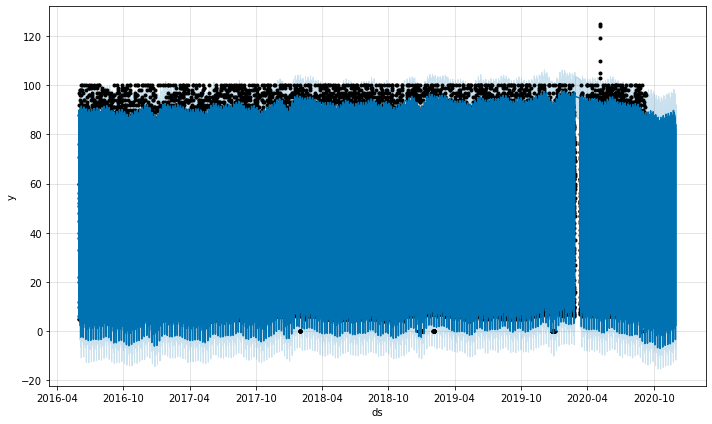

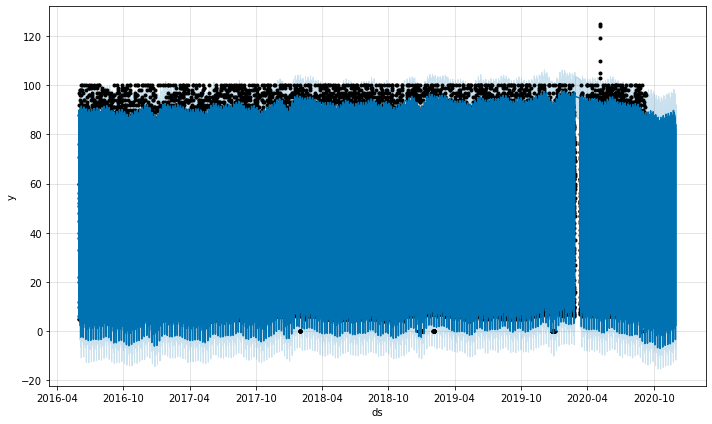

In [223]:
# Plot the Prophet predictions for the Mercado trends data
model_mercado_trends.plot(forecast_mercado_trends)

**Analysis**

The near-term forecast for the popularity of MercadoLibre is negative with a predicted downtrend.

In [232]:
# Set the index in the forecast_mercado_trends dataframe to ds
forecast_mercado_trends = forecast_mercado_trends.set_index("ds")

# View only the yhat,yhat_lower and yhat_upper columns
forecast_mercado_trends[["yhat", "yhat_lower", "yhat_upper"]]

,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.559904,80.858550,97.987357
2016-06-01 01:00:00,86.006714,78.196860,94.211300
2016-06-01 02:00:00,75.684247,66.760224,84.234654
2016-06-01 03:00:00,60.418068,52.285151,68.907989
2016-06-01 04:00:00,43.304247,34.500115,51.750560
...,...,...,...
2020-11-30 04:00:00,39.339200,31.078173,47.847920
2020-11-30 05:00:00,23.868008,15.614089,32.971986
2020-11-30 06:00:00,11.902278,3.288575,20.574389


In [237]:
# Holoviews extension to render hvPlots in Colab
# hv.extension('bokeh')

# Use hvPlot to visualize the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours 
forecast_mercado_trends[["yhat", "yhat_lower", "yhat_upper"]].iloc[-2000:, :].hvplot(
    title="Most Likely, Best Case, and Worst Case Forecasts from Prophet",
    xlabel="Date"
)

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

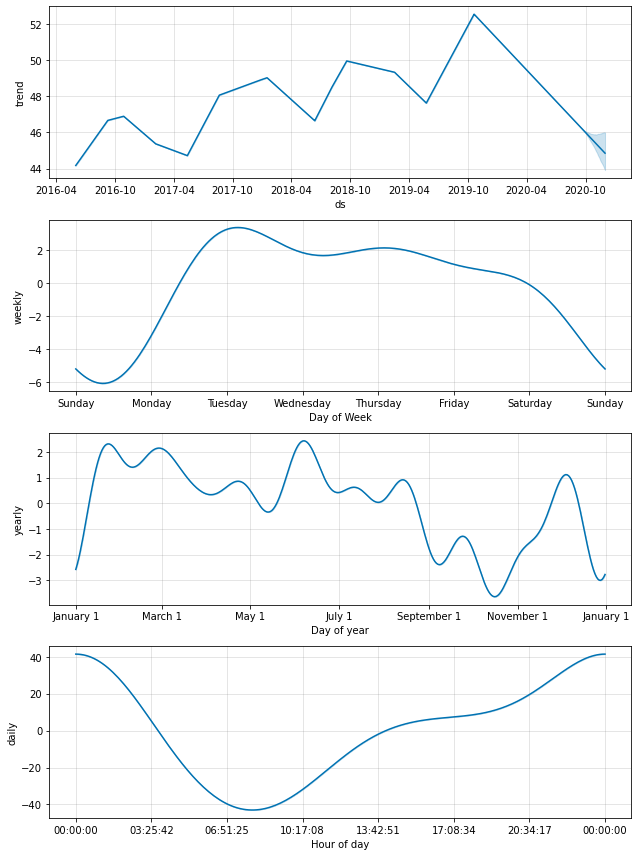

In [241]:
# Reset the index in the forecast_mercado_trends dataframe
forecast_mercado_trends = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results
figures_mercado_trends = model_mercado_trends.plot_components(forecast_mercado_trends)

**Analysis**

1. The time of day that exhibits the greatest popularity is 0:00 before it begins to drop and bottom out a bit after 6:51 before rising again.

2. The day of the week that gets the most search traffic is Tuesday.

3. The lowest point for search traffic in the year is October.

## Forecast Revenue by Using Time Series Models

In [242]:
# Setup file uploads with Colab
# from google.colab import files
# uploaded = files.upload()

# Read csv into dataframe - Colab
# df_mercado_sales = pd.read_csv(Path("/mercado_daily_revenue.csv"))

# Read csv into dataframe - Non-Colab
df_mercado_sales = pd.read_csv(
    Path("./Resources/mercado_daily_revenue.csv"),
    index_col='date',     
    parse_dates=True, 
    infer_datetime_format=True
)

# Review data to verify
df_mercado_sales

,Daily Sales
date,
2019-01-01,0.626452
2019-01-02,1.301069
2019-01-03,1.751689
2019-01-04,3.256294
2019-01-05,3.732920
...,...
2020-05-10,17.467814
2020-05-11,17.537152
2020-05-12,18.031773


In [244]:
# Holoviews extension to render hvPlots in Colab
# hv.extension('bokeh')

# Use hvPlot to visualize the daily sales figures 
df_mercado_sales.hvplot(
    title="Mercado Libre Daily Sales",
    x="Date"
)

:Curve   [Date]   (Daily Sales)

In [247]:
# Using df_mercado_sales, reset the index so date information is no longer the index
mercado_sales_prophet_df = df_mercado_sales.reset_index()

# Rename the columns to the Prophet model syntax 
mercado_sales_prophet_df.columns = ["ds", "y"]

# Verify data
mercado_sales_prophet_df

,ds,y
0,2019-01-01,0.626452
1,2019-01-02,1.301069
2,2019-01-03,1.751689
3,2019-01-04,3.256294
4,2019-01-05,3.732920
...,...,...
495,2020-05-10,17.467814
496,2020-05-11,17.537152
497,2020-05-12,18.031773
498,2020-05-13,19.165315


In [248]:
# Call Prophet function and store as object
mercado_sales_prophet_model = Prophet()

In [249]:
# Fit the time-series model
mercado_sales_prophet_model.fit(mercado_sales_prophet_df)

14:15:29 - cmdstanpy - INFO - Chain [1] start processing
14:15:29 - cmdstanpy - INFO - Chain [1] done processing


In [250]:
# Create future dataframe to hold predictions
mercado_sales_prophet_future = mercado_sales_prophet_model.make_future_dataframe(periods=90, freq="D")

# Verify dataframe
mercado_sales_prophet_future

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
585,2020-08-08
586,2020-08-09
587,2020-08-10
588,2020-08-11


In [254]:
# Make the predictions for trend data using mercado_sales_prophet_future
mercado_sales_prophet_forecast = mercado_sales_prophet_model.predict(mercado_sales_prophet_future)

# Verify dataframe
mercado_sales_prophet_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,0.132558,-1.580175,2.257704,0.132558,0.132558,0.063952,0.063952,0.063952,0.063952,0.063952,0.063952,0.0,0.0,0.0,0.196509
1,2019-01-02,0.171743,-1.588068,2.360325,0.171743,0.171743,0.083096,0.083096,0.083096,0.083096,0.083096,0.083096,0.0,0.0,0.0,0.254840
2,2019-01-03,0.210929,-1.662952,2.140243,0.210929,0.210929,0.019665,0.019665,0.019665,0.019665,0.019665,0.019665,0.0,0.0,0.0,0.230594
3,2019-01-04,0.250114,-1.744951,2.082430,0.250114,0.250114,-0.058242,-0.058242,-0.058242,-0.058242,-0.058242,-0.058242,0.0,0.0,0.0,0.191873
4,2019-01-05,0.289300,-1.779170,2.096015,0.289300,0.289300,-0.124421,-0.124421,-0.124421,-0.124421,-0.124421,-0.124421,0.0,0.0,0.0,0.164879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,2020-08-08,23.220342,21.088964,24.963607,23.217392,23.223202,-0.124421,-0.124421,-0.124421,-0.124421,-0.124421,-0.124421,0.0,0.0,0.0,23.095922
586,2020-08-09,23.259952,21.445806,25.252428,23.256952,23.262878,-0.034275,-0.034275,-0.034275,-0.034275,-0.034275,-0.034275,0.0,0.0,0.0,23.225677
587,2020-08-10,23.299561,21.442332,25.310589,23.296509,23.302498,0.050225,0.050225,0.050225,0.050225,0.050225,0.050225,0.0,0.0,0.0,23.349786
588,2020-08-11,23.339171,21.468871,25.485134,23.336073,23.342143,0.063952,0.063952,0.063952,0.063952,0.063952,0.063952,0.0,0.0,0.0,23.403122


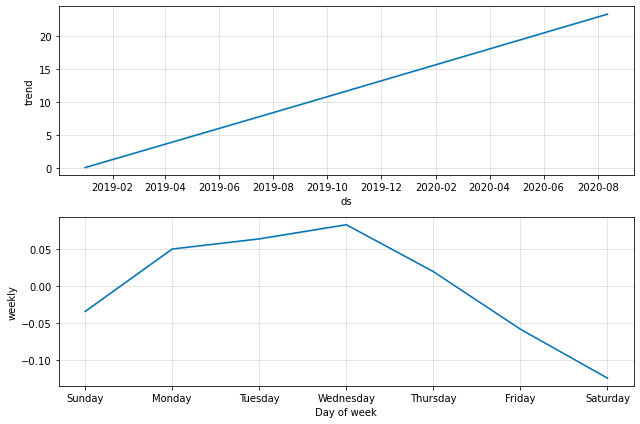

In [255]:
# Use the plot_components function to visualize the forecast results
figures_mercado_sales = mercado_sales_prophet_model.plot_components(mercado_sales_prophet_forecast)

**Analysis**

1. The peak revenue day during the week is Wednesday.

2. The trend shows continuous growth throughout the dates analyzed.

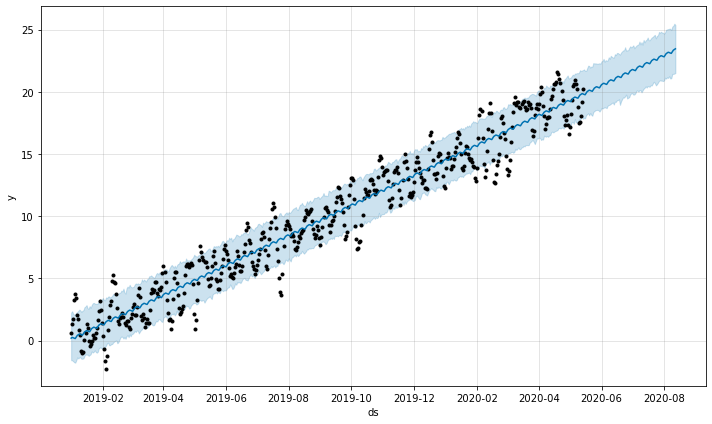

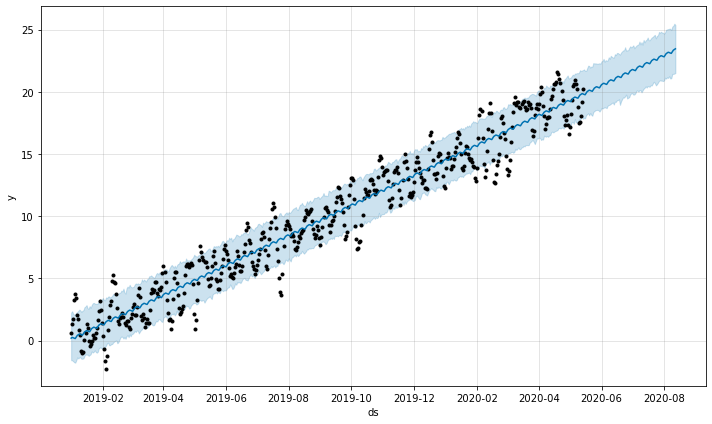

In [256]:
# Plot the Prophet predictions for the Mercado trends data
mercado_sales_prophet_model.plot(mercado_sales_prophet_forecast)

In [257]:
# Set the index in the mercado_sales_prophet_forecast dataframe to ds
mercado_sales_prophet_forecast = mercado_sales_prophet_forecast.set_index("ds")

# Verify dataframe
mercado_sales_prophet_forecast

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2019-01-01,0.132558,-1.580175,2.257704,0.132558,0.132558,0.063952,0.063952,0.063952,0.063952,0.063952,0.063952,0.0,0.0,0.0,0.196509
2019-01-02,0.171743,-1.588068,2.360325,0.171743,0.171743,0.083096,0.083096,0.083096,0.083096,0.083096,0.083096,0.0,0.0,0.0,0.254840
2019-01-03,0.210929,-1.662952,2.140243,0.210929,0.210929,0.019665,0.019665,0.019665,0.019665,0.019665,0.019665,0.0,0.0,0.0,0.230594
2019-01-04,0.250114,-1.744951,2.082430,0.250114,0.250114,-0.058242,-0.058242,-0.058242,-0.058242,-0.058242,-0.058242,0.0,0.0,0.0,0.191873
2019-01-05,0.289300,-1.779170,2.096015,0.289300,0.289300,-0.124421,-0.124421,-0.124421,-0.124421,-0.124421,-0.124421,0.0,0.0,0.0,0.164879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-08,23.220342,21.088964,24.963607,23.217392,23.223202,-0.124421,-0.124421,-0.124421,-0.124421,-0.124421,-0.124421,0.0,0.0,0.0,23.095922
2020-08-09,23.259952,21.445806,25.252428,23.256952,23.262878,-0.034275,-0.034275,-0.034275,-0.034275,-0.034275,-0.034275,0.0,0.0,0.0,23.225677
2020-08-10,23.299561,21.442332,25.310589,23.296509,23.302498,0.050225,0.050225,0.050225,0.050225,0.050225,0.050225,0.0,0.0,0.0,23.349786


In [264]:
# Create forecast_quarter dataframe using periods 2020-07-01 to 2020-09-30 containing the yhat_upper, yhat_lower, and yhat columns
mercado_sales_forecast_quarter = mercado_sales_prophet_forecast[["yhat", "yhat_lower", "yhat_upper"]].loc["2020-07-01":"2020-09-30"]

# Update the column names to be more readable
mercado_sales_forecast_quarter.columns = ["Most Likely", "Worst Case", "Best Case"]

# Use .head() to verify data
mercado_sales_forecast_quarter.head()

,Most Likely,Worst Case,Best Case
ds,,,
2020-07-01,21.798279,19.886193,23.644266
2020-07-02,21.774457,19.775024,23.742997
2020-07-03,21.736160,19.787096,23.501097
2020-07-04,21.709590,19.883462,23.625042
2020-07-05,21.839345,20.093380,23.720544


In [266]:
# Displayed the summed values for all rows
mercado_sales_forecast_quarter.sum()

Most Likely     969.603291
Worst Case      886.846847
Best Case      1051.197710
dtype: float64

**Analysis**

The sales forecast for the next quarter shows that the most likely outcome would be 970 sales for the quarter. The worst case scenario would be 887 sales while the best case scenario would be 1052 sales.